# Значение на Big Data за борба със сърдечните заболявания

# Увод


### Сърдечносъдовите заболявания са водеща причина за смъртта във всички части на света, с изключение на Африка. Те са отговорни за 17,9 милиона смъртни случая (32,1%) през 2015 г. Оценено е, че до 90% от сърдечносъдовите заболявания са предотвратими.
## В това изследване ще проследим, кои групи от населението са по-уязвими и ще потърсим зависимости в данните, които може да послужат за намаляване на смъртността от сърдечни заболявания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Прочитаме набора от данни

Прочитаме набора от данни от файла data/heart_part1.csv в променливата heart_data. Ето кратко описание на значението на всяка колона:

1.   Age: patient's age (years)

2.   Sex: patient's sex (M: Male, F: Female)

3.  ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

4.  RestingBP: resting blood pressure (mm Hg)
5.  Cholesterol: serum cholesterol (mm/dl)


6.  FastingBS: fasting blood glucose (1: if FastingBS > 120 mg/dl, 0: otherwise)


7.  RestingECG: Resting ECG results (Normal: normal, ST: with ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes criteria)


8.  MaxHR: maximum heart rate reached (Numeric value between 60 and 202)


9.  ExerciseAngina: exercise-induced angina (Y: Yes, N: No)

10.  Oldpeak: old peak = ST (Numerical value measured in depression)
11. ST_Slope: the slope of the peak exercise ST segment (Up upsloping, Flat: flat, Down downsloping)

In addition, there is the response variable, which in this case is a binary variable:

12.  HeartDisease: output class (1: heart disease, 0: normal)

In [ ]:
file_path = '/content/drive/MyDrive/Heart-disease/heart_part1.csv'

In [ ]:
 heart_data = pd.read_csv(file_path)

# Проверяваме и попълваме липсващите данни

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      500 non-null    int64  
 1   Age             500 non-null    int64  
 2   Sex             500 non-null    object 
 3   ChestPainType   500 non-null    object 
 4   RestingBP       500 non-null    int64  
 5   Cholesterol     500 non-null    int64  
 6   FastingBS       500 non-null    int64  
 7   RestingECG      500 non-null    object 
 8   MaxHR           500 non-null    int64  
 9   ExerciseAngina  500 non-null    object 
 10  Oldpeak         500 non-null    float64
 11  ST_Slope        500 non-null    object 
 12  HeartDisease    500 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 50.9+ KB


In [ ]:
heart_data.isnull()

In [ ]:
heart_data.isnull().sum()

Unnamed: 0        0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

В набора от данни няма празни полета

### Обработка на данните

In [ ]:
heart_data = heart_data[heart_data['HeartDisease'] != 0]

In [ ]:
heart_data.reset_index(drop=True, inplace=True)

In [ ]:
print(heart_data)

     Unnamed: 0  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  \
0             1   49   F           NAP        160          180          0   
1             3   48   F           ASY        138          214          0   
2             8   37   M           ASY        140          207          0   
3            11   58   M           ATA        136          164          0   
4            13   49   M           ASY        140          234          0   
..          ...  ...  ..           ...        ...          ...        ...   
279         494   60   M           ASY        142          216          0   
280         495   64   F           ASY        142          276          0   
281         497   61   M           ASY        146          241          0   
282         498   67   M           ASY        160          384          1   
283         499   62   M           ASY        135          297          0   

    RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0   

Премахваме редовете с хора, които нямат сърдечни проблеми и пренареждаме индексите

### Проверка за баланса на данните по съответен фактор

Ще проверим баланса на данните в набора от данни

In [ ]:
hd = heart_data

In [ ]:
hd['Sex'].value_counts()

M    261
F     23
Name: Sex, dtype: int64

Данните са небалансирани по отношение на пол

In [ ]:
hd['Age'].value_counts()

52    15
56    14
60    14
54    14
61    13
63    13
58    12
57    12
59    12
55    12
51    11
53    11
62    10
38     9
48     9
50     9
47     9
46     9
49     8
65     8
43     7
64     6
41     5
40     4
69     4
66     3
68     3
67     3
44     3
32     2
42     2
36     2
70     2
34     2
35     2
73     1
77     1
72     1
31     1
74     1
37     1
45     1
39     1
33     1
75     1
Name: Age, dtype: int64

Данните са небалансирани и по относшение на възраст, но са разнообразни, поради наличието на хора от всякакви зъзрасти

# Изследваме данните: единични променливи

### Създаваме кръгова диаграма за да визуализираме съотношението на сърдечните проблеми между мъже и жени

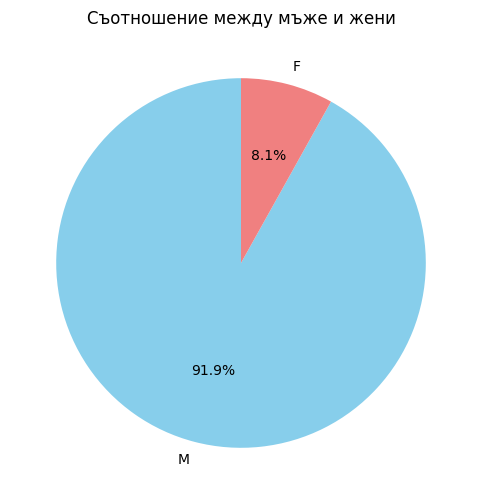

In [ ]:
sex_counts = hd['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Съотношение между мъже и жени')
plt.show()

Както можем да видим съотношението между мъжете със сърдечни болести и жените с такива, в кръговата диаграма, показва, че мъжете имащи сърдечни проблеми са около 10 пъти повече от жените. Това може да се дължи на небалансираното разпределение на данните в набора от данни, но поради изключително голямата разлика, можем да заключим че мъжете са по-рискова група.   

### Създаваме хистограма представяща съотношението между възраст и честота на сърдечни заболявания

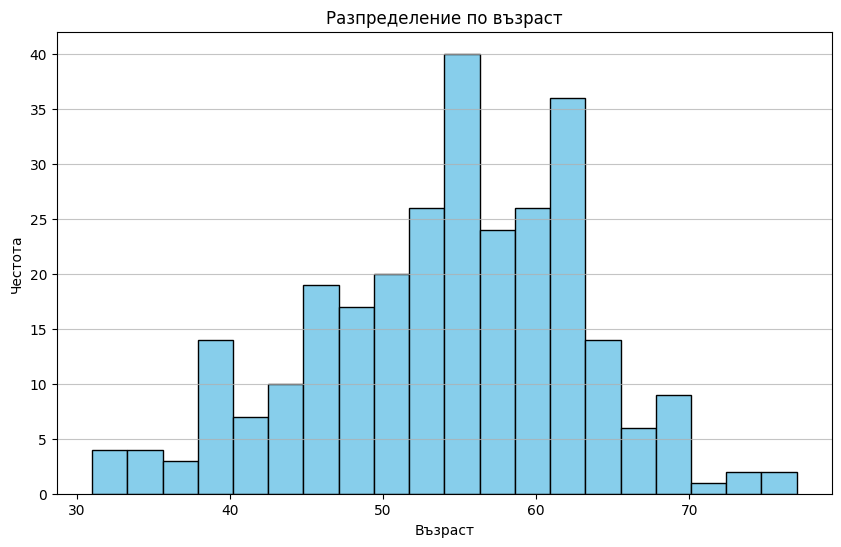

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(hd['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Разпределение по възраст')
plt.xlabel('Възраст')
plt.ylabel('Честота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Забелязваме, че с нарастване на възрастта нараства и честотана на сърдечните проблеми. Също така виждаме, че честотата на сърдечните заболявания е най-висока между 52 и 62 годишна възраст. Това може да се дължи на средното ниво на стрес.

### Добавяме набор от данни представящ нивото на стрес, сред различни възрастови групи.

In [ ]:
file_path2 = '/content/drive/MyDrive/Heart-disease/Age_Stress.csv'

In [ ]:
stress_data = pd.read_csv(file_path2)

In [ ]:
print(stress_data)

     Person ID  Stress Level  Age
0            1             6   27
1            2             8   28
2            3             8   28
3            4             8   28
4            5             8   28
..         ...           ...  ...
369        370             2   59
370        371             3   59
371        372             4   59
372        373             3   59
373        374             3   59

[374 rows x 3 columns]


### Създаваме хистограма от новият набор данни, която да представя съотношението между възрастта и нивото на стрес

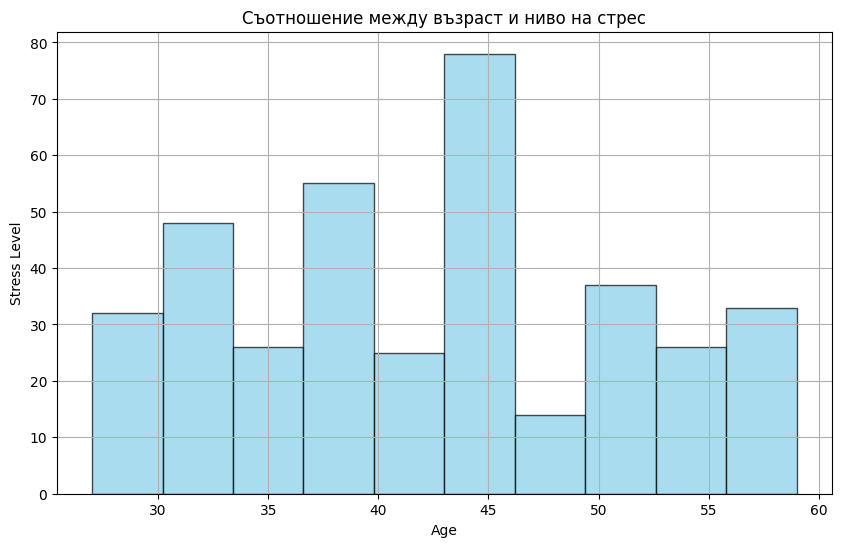

In [ ]:
sd = stress_data

plt.figure(figsize=(10, 6))
plt.hist(sd['Age'], bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Съотношение между възраст и ниво на стрес')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()

От хистограмата разбираме, че нивото на стрес не афектира пряко честотата на сърдечните заболявания, но поради близостта на гонитите с най-високо средно ниво на стрес и най-високо ниво на сърдечните проблеми, можем да заключим, че високото ниво на стрес увеличава шансовете за появата на сърдечносъдови заболявания

# Изследваме корелациите в набора от данни

In [ ]:
hd.corr()

<ipython-input-52-e8a95fe6b641>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hd.corr()


,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Unnamed: 0,1.000000,0.418895,0.012940,-0.576417,0.272031,-0.170291,-0.036859,NaN
Age,0.418895,1.000000,0.266041,-0.240804,0.142323,-0.361558,0.042526,NaN
RestingBP,0.012940,0.266041,1.000000,0.173166,-0.067173,-0.187684,0.156719,NaN
Cholesterol,-0.576417,-0.240804,0.173166,1.000000,-0.323760,0.144735,0.199965,NaN
FastingBS,0.272031,0.142323,-0.067173,-0.323760,1.000000,0.061351,-0.092209,NaN
MaxHR,-0.170291,-0.361558,-0.187684,0.144735,0.061351,1.000000,0.081546,NaN
Oldpeak,-0.036859,0.042526,0.156719,0.199965,-0.092209,0.081546,1.000000,NaN
HeartDisease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def plot_corr(dataframe,size=10):

    corr = dataframe.corr()

    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation = 90)
    plt.yticks(range(len(corr.columns)), corr.columns)

<ipython-input-53-6969ce0ab6fe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


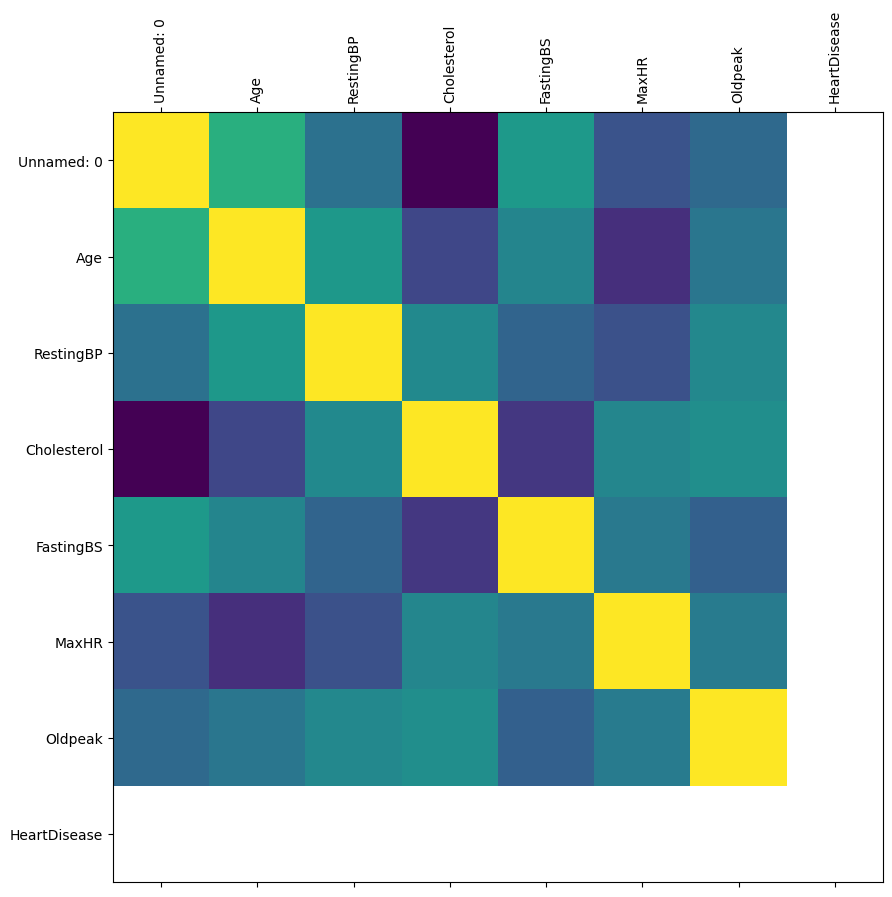

In [ ]:
plot_corr(hd)

Има относително силна отрицателна корелация между "Cholesterol" и "FastingBS". Този резултат може да указва, че по-високите нива на холестерол са свързани с по-ниски нива на кръвна захар.

# Заключение


Сърдечносъдовите заболявания са едни от най-опасните болести в световен мащаб като в нашето забързано и нездраволсловно ежедневие те стават все по-чести.
Нашето изследвано показа, че най-уязвимата част от обществото са мъжете над 40 годишна възраст. Много други фактори също оказват влияние, например нивото на холестерол и кръвна захар.
Според СЗО основни допринасящи фактори за развиване на сърдечносъдови проблеми са:  
употребата на тютюн, нездравословното хранене, вредната употреба на алкохол, липсата на физическа активност и замърсяването на въздуха.
Въз основа на проучване на Световната здравна организация сърдечносъдовите проблеми не сами по себе си, колкото в комбинация с инфекциозни болести.
В заключение тези болести стават все по-чести в нашето общество, но за тях има една лесна и основна превенция, а именно воденето на колкото се може по-здравословен начин на живот.